# EDA

Для разведовочного анализа данных воспользуемся готовым инструментом - sweetviz.

In [17]:
# !pip install sweetviz
# https://github.com/fbdesignpro/sweetviz

In [18]:
# import sweetviz as sv
# import IPython
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [19]:
train_df = pd.read_csv('data/train_df.csv')
test_df = pd.read_csv('data/test_df.csv')

In [20]:
train_df.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [21]:
train_df.shape

(15081, 81)

In [22]:
test_df.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0


In [23]:
test_df.shape

(1529, 81)

In [24]:
# train_report = sv.analyze([train_df, " Permit Logs"])
# test_report = sv.analyze([test_df, " Permit Logs"])

In [25]:
# train_report.show_html('common_analysis_train_df.html')
# test_report.show_html('common_analysis_test_df.html')

In [26]:
# IPython.display.HTML('common_analysis_train_df.html')

In [27]:
# IPython.display.HTML('common_analysis_test_report.html')

Полученные отчеты находятся в папке eda_reports.

# Data Preprocessing

In [28]:
# %pip install category_encoders
# %pip install sklearn

In [29]:
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

В первую очередь удалим из тренировочных и тестовых данных пропуски в целевой переменной и дупликаты.

In [30]:
train_df.drop_duplicates(inplace=True)
train_df.dropna(subset=['target'], inplace=True)
train_df.fillna(np.median, inplace=True)
display(train_df)

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [31]:
test_df.drop_duplicates(inplace=True)
test_df.dropna(subset=['target'], inplace=True)
test_df.fillna(np.median, inplace=True)
display(test_df)

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,493078,9,0,0,0,9,4,35,0,0,...,0.341683,0.067348,0.023012,0,0,0,0.46108,0.0,0.0,0
1525,493078,9,0,0,0,9,4,35,0,0,...,0.270293,0.049000,0.013244,0,0,0,0.03674,0.0,0.0,0
1526,493078,9,0,0,0,9,4,35,0,0,...,0.372268,0.069882,0.026015,0,0,0,0.14540,0.0,0.0,1
1527,493078,9,0,0,0,9,4,35,0,0,...,0.355755,0.077469,0.027560,0,0,0,0.21288,0.0,0.0,1


Из отчетов EDA можно заметить что в датасете 4 константы: 'feature_0', 'feature_73', 'feature_74', 'feature_75', и 15 категориальных фичей. Константы удалим из датасета, а категориальные - закодируем с помощью One Hot Encoding. В тестовом отчете feature_23 выделяется как дискретная, а в тренировочном как непрерывная, что связано, скорее всего, с разбиением. Поэтому не будем ее кодировать. Полученные признаки отмасштабируем.

In [32]:
X_train = train_df.drop(columns=['search_id', 'target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['search_id', 'target'])
y_test = test_df['target']

In [33]:
const_cols_train = X_train.loc[:, X_train.nunique() == 1].columns.to_list()
const_cols_test = X_test.loc[:, X_test.nunique() == 1].columns.to_list()

assert len(const_cols_train) == len(const_cols_test)

const_cols = const_cols_train

cat_cols_train = X_train.loc[:, (1 < X_train.nunique()) & (X_train.nunique() <= 10)].columns.to_list()
cat_cols_test = X_test.loc[:, (1 < X_test.nunique()) & (X_test.nunique() <= 9)].columns.to_list()

assert len(cat_cols_train) == len(cat_cols_test)

cat_cols = cat_cols_train

In [34]:
X_train.drop(const_cols, axis=1, inplace=True)
X_test.drop(const_cols, axis=1, inplace=True)

In [35]:
encoder = OneHotEncoder(drop='first')
ohe_encoder = ce.OneHotEncoder(cols=cat_cols)

X_train = ohe_encoder.fit_transform(X_train)

X_test = ohe_encoder.transform(X_test)

X_train.shape, X_test.shape

((15069, 121), (1526, 121))

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline

В качестве бейзлайна попробуем логистическую регрессию, случайный лес и градиентный бустинг.

In [37]:
# %pip install catboost

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import ndcg_score

### LogisticRegression

In [39]:
clf = LogisticRegression(solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.5821790346100871

### RandomForestClassifier

In [40]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.5180679842478836

### CatBoostClassifier

In [41]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.01, 
    loss_function='Logloss'
)

clf.fit(X_train, y_train, verbose=False)

predictions = clf.predict(X_test)
ndcg_score([y_test.values], [predictions])

0.3900348313247031

# Improvement LogisticRegression 

Поскольку наилучший результат из всех моделей показала логрегрессия попробуем улучшить ее с помощью отбора наиболее важных признаков.

In [42]:
# %pip install seaborn

In [43]:
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer

SEED = 42

In [44]:
X = train_df.drop(['search_id', 'feature_0', 'feature_73', 'feature_74', 'feature_75', 'target'], axis=1).copy()
y = train_df['target'].values

In [45]:
def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(data, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(15, 15), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(15, 15), legend=False));
        
    else:
        raise KeyError('Unknown model_type')

def grid_search(model, gs_params):
    '''Функция для подбора гиперпараметров с помощью перекрёстной проверки'''
     
    gs = GridSearchCV(estimator=model, param_grid=gs_params, refit=True,
                      scoring='roc_auc', n_jobs=-1, cv=skf, verbose=0)
    gs.fit(X, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(5)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    return gs

scores = [0.70965572 0.75060381 0.68703341 0.68670997 0.66169146] 
mean score = 0.69914 +/- 0.02987


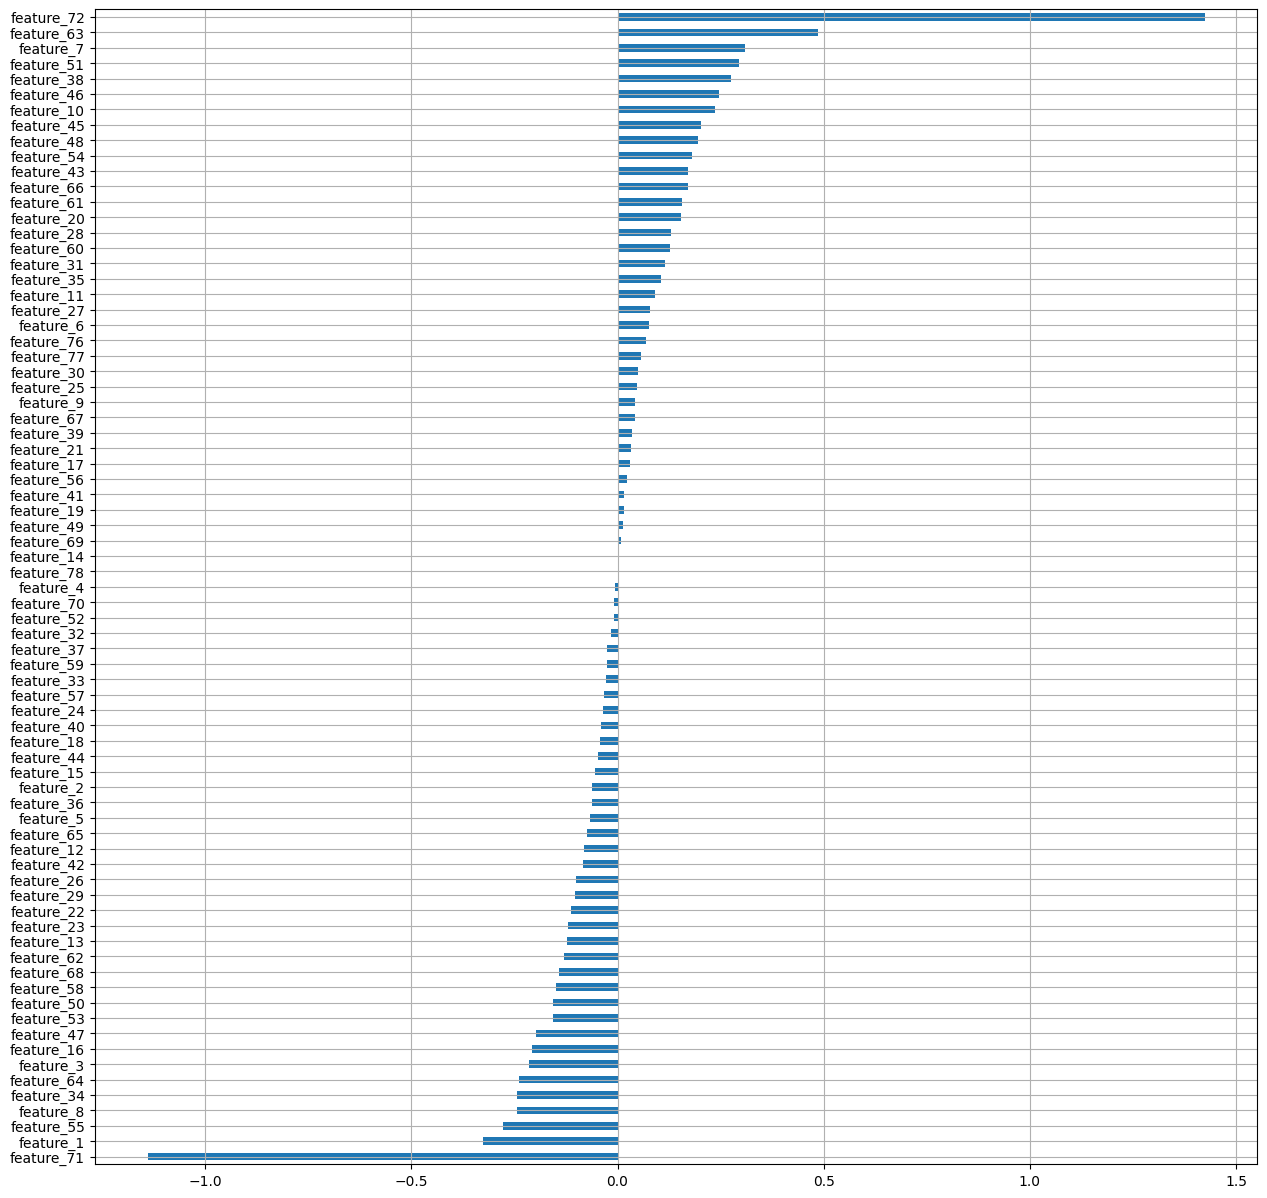

In [46]:
lr = Pipeline([('p_trans', PowerTransformer(method='yeo-johnson', standardize=True)),
               ('lr', LogisticRegression(solver='liblinear',
                                         penalty='l1',
                                         max_iter=200,
                                         class_weight='balanced',
                                         random_state=SEED)
               )])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

scores = cross_val_score(estimator=lr, X=X, y=y, 
                         cv=skf, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

plot_features_scores(model=lr, data=X, target=y, column_names=X.columns, model_type='lr')

In [47]:
selector = GenericUnivariateSelect(score_func=mutual_info_classif, 
                                   mode='k_best', 
                                   param=6)
selector.fit(X, y)
features = pd.DataFrame(data={'score':selector.scores_,
                   'support':selector.get_support()}, 
             index=X.columns).sort_values(by='score',ascending=False)
features

,score,support
feature_30,0.009292,True
feature_31,0.007973,True
feature_32,0.007679,True
feature_27,0.007223,True
feature_29,0.007197,True
...,...,...
feature_15,0.000000,False
feature_12,0.000000,False
feature_8,0.000000,False
feature_7,0.000000,False


In [48]:
X_train = train_df[features[features.support == True].index.tolist()]
X_train = scaler.fit_transform(X_train)
y_train = train_df['target']

X_test = test_df[features[features.support == True].index.tolist()]
X_test = scaler.transform(X_test)
y_test = test_df['target']

In [49]:
clf = LogisticRegression(solver='liblinear', penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.38205048307823314

Значение NDCG сильно "просело". Выбранные признаки оказались не настолько важными, как казалось при первоначальной оценке. Создадим 12 шумовых признаков, элементами которых будут некоррелируемые случайные числа из выборок с нормальным, равномерным и Лапласовым распределениями. Параметры каждого распределения подбираются случайным образом независимо друг от друга. Шумовые признаки добавим в исходный датасет.

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,lapl_0,norm_1,unif_1,lapl_1,norm_2,unif_2,lapl_2,norm_3,unif_3,lapl_3
0,0,0,1,20,3,40,0,3,1,0,...,8.377884,4.884901,2.067384,11.384754,-1.817467,6.194212,9.204959,6.187673,3.317003,10.438366
1,0,0,1,20,3,40,0,3,0,0,...,0.480493,-4.167020,1.422408,6.241506,-0.925163,4.605846,6.497490,-1.376993,3.775690,5.407391
2,0,0,1,20,3,40,0,3,1,0,...,9.341984,-3.304184,4.571725,6.823898,-5.267273,5.555335,12.736076,13.109628,3.275997,10.645582
3,0,0,1,20,3,40,0,3,1,1,...,10.422382,-5.047965,1.690115,-10.370511,12.698548,4.963845,10.085808,9.439261,3.871018,8.796567
4,0,0,1,20,3,40,0,3,1,1,...,-0.892880,-2.012251,4.880508,29.783200,13.570378,6.118954,3.891772,-4.390031,4.609209,9.969602


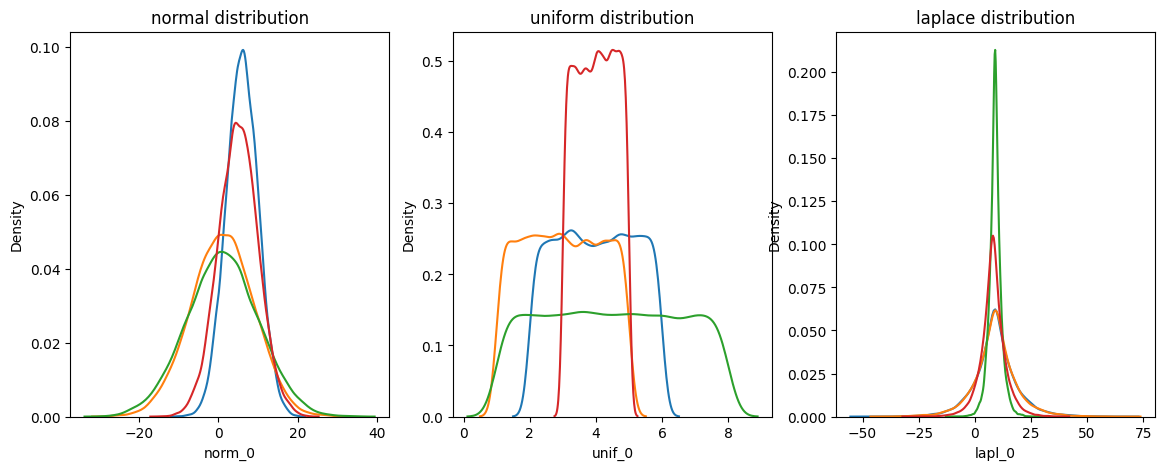

In [50]:
np.random.seed(SEED)

fix, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
ax1.set_title("normal distribution")
ax2.set_title("uniform distribution")
ax3.set_title("laplace distribution")
for i in range(4):
    X.loc[:, f'norm_{i}'] = np.random.normal(loc=np.random.randint(low=0, high=10), 
                                             scale=np.random.randint(low=1, high=10), 
                                             size=(X.shape[0], 1))
    
    X.loc[:, f'unif_{i}'] = np.random.uniform(low=np.random.randint(low=1, high=4), 
                                              high=np.random.randint(low=5, high=10), 
                                              size=(X.shape[0], 1))
    
    X.loc[:, f'lapl_{i}'] = np.random.laplace(loc=np.random.randint(low=0, high=10), 
                                              scale=np.random.randint(low=1, high=10), 
                                              size=(X.shape[0], 1))
    sns.kdeplot(X[f'norm_{i}'], ax=ax1)
    sns.kdeplot(X[f'unif_{i}'], ax=ax2)
    sns.kdeplot(X[f'lapl_{i}'], ax=ax3)

X.head()

grid search results for lr
scores = [0.7138983050847457, 0.7478760593220338, 0.6958551790698281, 0.6896209927746042, 0.6567533485927433], 
mean score = 0.70080 +/- 0.02992            
best params = {'lr__C': 0.01}


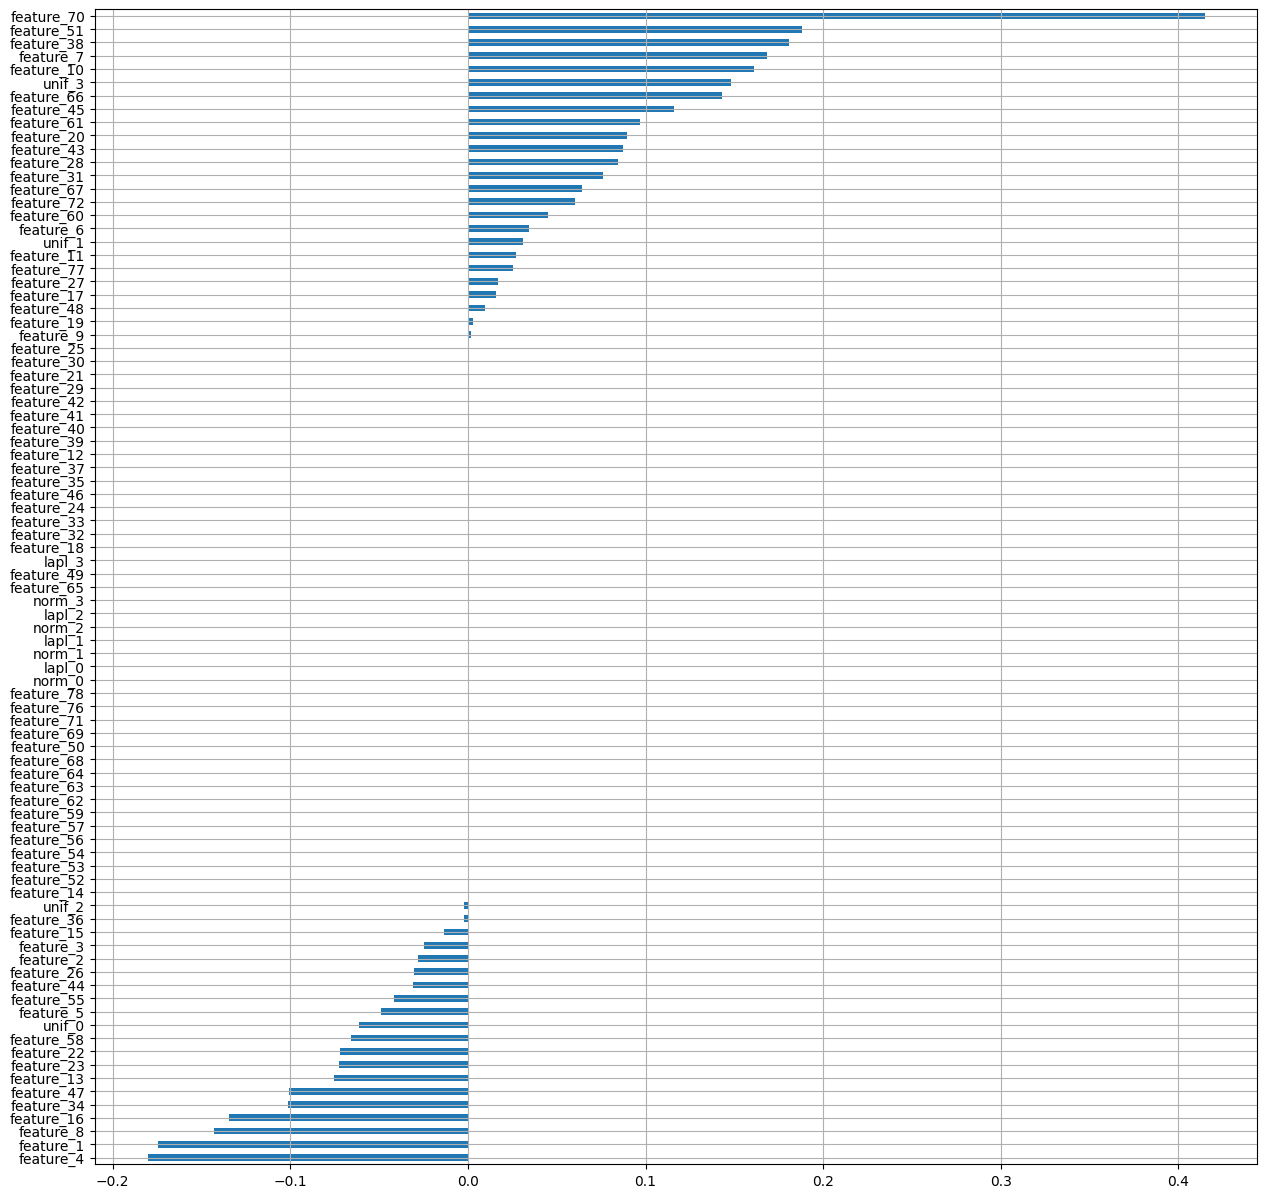

In [51]:
lr_params = {'lr__C': np.logspace(-3, 1.5, 10)}
             
print('grid search results for lr')
lr_grid = grid_search(model=lr, gs_params=lr_params)

plot_features_scores(model=lr_grid.best_estimator_, 
                     data=X, target=y, column_names=X.columns, model_type='lr')

In [52]:
lr_selector = SelectFromModel(estimator=lr_grid.best_estimator_['lr'], prefit=True, threshold=0.1)

all_features = pd.DataFrame(data={'score':lr_selector.estimator.coef_[0],
                   'support':lr_selector.get_support()}, 
             index=X.columns).sort_values(by='score',ascending=False)
all_features

,score,support
feature_70,0.414665,True
feature_51,0.187933,True
feature_38,0.180764,True
feature_7,0.168562,True
feature_10,0.161181,True
...,...,...
feature_34,-0.101192,True
feature_16,-0.134220,True
feature_8,-0.143041,True
feature_1,-0.174559,True


Отбирем те признаки, у которых support равен True, за исключением шумовых.

In [53]:
features = [feature for feature in all_features[(all_features.support == True) & (all_features.score >= 0.05)].index.to_list() if feature in train_df.drop(['search_id', 'target'], axis=1).columns.to_list()]

X_train = train_df[features]
X_train = scaler.fit_transform(X_train)
y_train = train_df['target'].values

X_test = test_df[features]
X_test = scaler.transform(X_test)
y_test = test_df['target']

In [54]:
clf = LogisticRegression(solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.6522456757234839

Значение метрики NDCG выросло по сравнению с изнчальным, попробуем улучшить полученный результат. Поскольку мы добавляли в модель "шум", некоторые признаки могли потерять важность. Поэтому попробуем жадно подобрать признаки.

In [56]:
ndcg_max_score_1 = 0
ndcg_max_score_2 = 0
cols = train_df.drop(['search_id', 'target'], axis=1).columns.to_list()
features_1 = ['feature_70', 'feature_38', 'feature_51', 'feature_7', 'feature_10', 'feature_66', 'feature_45']
features_2 = ['feature_70', 'feature_38', 'feature_51', 'feature_7', 'feature_10', 'feature_66', 'feature_45']

prev_features_1_len = len(features_1) - 1
prev_features_2_len = len(features_2) - 1

i = 0

while prev_features_1_len != len(features_1) and  prev_features_2_len != len(features_2):
    i += 1
    prev_features_1_len = len(features_1)
    prev_features_2_len = len(features_2)
    for feature in all_features.index.to_list():
        if feature in cols:
            temp_features_1 = []
            temp_features_1.extend(features_1)
            temp_features_1.append(feature)
            
            temp_features_2 = []
            temp_features_2.extend(features_2)
            temp_features_2.append(feature)
            
            scaler_1 = StandardScaler()

            X_train_1 = train_df[temp_features_1]
            X_train_1 = scaler_1.fit_transform(X_train_1)
            y_train_1 = train_df['target'].values

            X_test_1 = test_df[temp_features_1]
            X_test_1 = scaler_1.transform(X_test_1)
            y_test_1 = test_df['target']
            
            clf_1 = LogisticRegression(solver='liblinear', penalty='l1')
            clf_1.fit(X_train_1, y_train_1)
            predictions_1 = clf_1.predict_proba(X_test_1)[:, 1]
            score_1 = ndcg_score([y_test_1.values], [predictions_1])
            
            scaler_2 = StandardScaler()

            X_train_2 = train_df[temp_features_2]
            X_train_2 = scaler_2.fit_transform(X_train_2)
            y_train_2 = train_df['target'].values

            X_test_2 = test_df[temp_features_2]
            X_test_2 = scaler_2.transform(X_test_2)
            y_test_2 = test_df['target']
            
            clf_2 = LogisticRegression(solver='liblinear', penalty='l2')
            clf_2.fit(X_train_2, y_train_2)
            predictions_2 = clf_2.predict_proba(X_test_2)[:, 1]
            score_2 = ndcg_score([y_test_2.values], [predictions_2])
            
            if score_1 > ndcg_max_score_1:
                ndcg_max_score_1 = score_1
                features_1.append(feature)
                
            if score_2 > ndcg_max_score_2:
                ndcg_max_score_2 = score_2
                features_2.append(feature)

    print(f'Max NDCG-score L1 on {i} iteration {ndcg_max_score_1}')
    print(f'Max NDCG-score L2 on {i} iteration {ndcg_max_score_2}')

Max NDCG-score L1 on 1 iteration 0.6964814857234423
Max NDCG-score L2 on 1 iteration 0.70035199144343
Max NDCG-score L1 on 2 iteration 0.6980743499585323
Max NDCG-score L2 on 2 iteration 0.7209826567775595
Max NDCG-score L1 on 3 iteration 0.6993433247500275
Max NDCG-score L2 on 3 iteration 0.7229705407363506
Max NDCG-score L1 on 4 iteration 0.7176091947332368
Max NDCG-score L2 on 4 iteration 0.7242270804648465
Max NDCG-score L1 on 5 iteration 0.7198801533978977
Max NDCG-score L2 on 5 iteration 0.7242270804648465


In [57]:
X_train = train_df[features_1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = train_df['target'].values

X_test = test_df[features_1]
X_test = scaler.transform(X_test)
y_test = test_df['target']

In [58]:
clf = LogisticRegression(solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.7198833303754512

In [59]:
X_train = train_df[features_2]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = train_df['target'].values

X_test = test_df[features_2]
X_test = scaler.transform(X_test)
y_test = test_df['target']

In [60]:
clf = LogisticRegression(solver='liblinear', penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
ndcg_score([y_test.values], [predictions])

0.7242270804648465

In [61]:
from collections import Counter

print(Counter(features_2))

Counter({'feature_70': 4, 'feature_38': 3, 'feature_10': 3, 'feature_43': 3, 'feature_49': 2, 'feature_69': 2, 'feature_65': 2, 'feature_30': 2, 'feature_32': 2, 'feature_60': 2, 'feature_46': 2, 'feature_51': 1, 'feature_7': 1, 'feature_66': 1, 'feature_45': 1, 'feature_28': 1, 'feature_27': 1, 'feature_54': 1, 'feature_41': 1, 'feature_15': 1, 'feature_6': 1, 'feature_9': 1, 'feature_52': 1, 'feature_78': 1, 'feature_25': 1, 'feature_21': 1, 'feature_24': 1, 'feature_47': 1, 'feature_29': 1, 'feature_77': 1})


# Вывод

Испробовав различные алгоритмы машинного обучения, выбор остановился на логистической регрессии, как показавшей наиболее лучший скор по метрике NDCG. В дальнейшем с помощью различных техник были подобраны признаки для выбранной модели и вид регуляризации - L2. Итоговый результат равен 0.724, что довольно таки неплохо. 